In [138]:
%load_ext autoreload
%autoreload 2

import pandas as pd 
import numpy as np 

from analysis_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analysis_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analysis_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analysis_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analysis_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
data_path = "../data/raw/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data_path)

## Insights about Dataset

#### **1. Data Types and Non-null Counts:**
- The dataset contains **5110 entries** and **12 columns**.
- **Data Types:** There are 3 columns with `float64` data type, 4 columns with `int64` data type and 5 columns with `object` data type.
    - **Numerical Columns**: These include features like `id`, `age`, `avg_glucose_level` and `bmi`.
    - **Categorical Columns**: These include features like `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, etc. Note that many of these categorical features have `int64` data types.

#### **2. Summary Statistics:**
- **Numerical Features**:
    - `age` ranges from **~1 month to 82 years**, indicating that the dataset includes both young and old people. 50% of participants are aged 45 years or younger, while the elderly (above 61 years) represent the upper 25%.
    - `avg_glucose_level` has a wide range of **~55 to ~271** with a mean and standard deviation of **106.14** and **45.28** respectively.
    - Similarly, `bmi` has a wide distribution range of **~29 to ~97** with a mean and standard deviation of **28.89** and **7.85** respectively.

- **Categorical Features**:
    - The target variable `stroke` has a binary outcome (0 or 1) with only **4.87% of participants having experienced a stroke**.
    - `hypertension` and `heart_disease` are also binary variables (0 or 1) with only **9.7% and 5.4% of participants having hypertension and heart disease respectively**.
    - Most participants are **Female (2,994 out of 5,110)**.
    - **65.6% of participants have been married (3,353 individuals)**, indicating a predominance of married participants.
    - Most participants **never smoked (1,892 individuals, 37%)**.
    - There is a **significant class imbalance** for all of these features.

#### **3. Missing Values Analysis:**
- All features except one do not have any missing values.
- `BMI` has missing data (count = 4,909 instead of 5,110), requiring imputation or handling.



In [147]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
# Step 1: Basic Data Inspection

data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [32]:
# Switch strategy to Summary Statistics Inspection

data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
7


Missing Values Count by Column:
bmi    201
dtype: int64

Visualizing Missing Values...


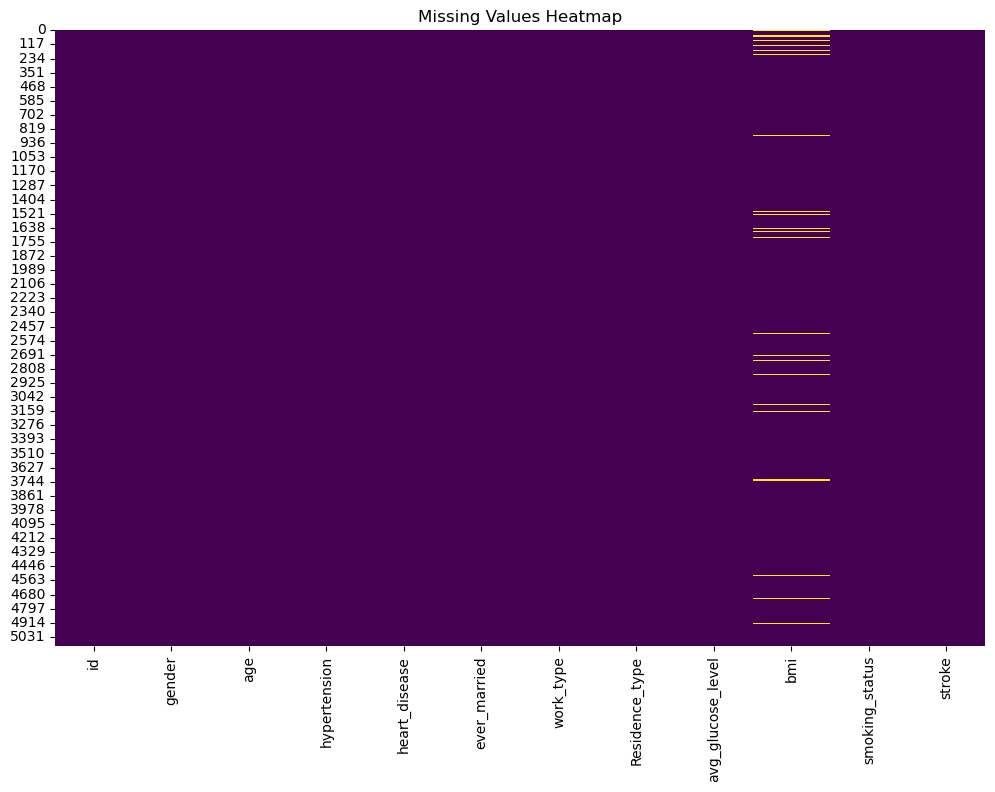

In [34]:
# Step 2: Missing Values Analysis

missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

## Insights from Univariate and Bivariate Analysis

#### **1. Univariate Analysis:**
- **Stroke Distribution:**
    - The stroke column shows **significant class imbalance** (only ~4.87% have had a stroke).
    - The model may become biased toward predicting the majority class (no stroke).
- **Age Distribution:**
    - Healthy participants (no stroke) have a more **evenly distributed age**, with a notable peak in the middle-aged range (30-50 years).
    - Participants with stroke are **typically older** (above 60 years) and show peaks in the 70-80 years range.
    - This indicates that **stroke occurences are heavily concentrated among elderly individuals**.
- **Average Glucose Level Distribution:**
    - Average glucose level distribution show **two distinct peaks (~80-100 mg/dL and ~200-220 mg/dL)** in both healthy participants and those with stroke.
    - Relatively larger proportion of participants with **stroke have higher average glucose level** compared to healthy participants.
    - In real world, ~80-100 mg/dL of glucose level is typical of individuals without diabetes or with controlled diabetes and ~200-220 mg/dL of glucose level is for individuals with diabetes.
- **BMI Distribution:**
    - BMI in both healthy and participants with stroke appear to be **normally distributed with a mean ~30**.
    - Participants with stroke might have a **slighlty higher BMI** vs healthy participants but statistical significance analysis is needed for confirmation.
- **Smoking Status Distribution:**
    - Higher proportion of participants who **smoke or formerly smoked have stroke**.
- **Hypertension Distribution:**
    - Significantly higher proportion of participants who are **positive for hypertension have stroke**.

#### **2. Bivariate Analysis:**
- **Age vs. Average Glucose Level (Numerical vs. Numerical):**
    - Participants with **higher age** are more likely to have **higher average glucose level** compared to younger participants.
    - Participants with stroke are more likely to be **older** and have **higher average glucose level**.
- **Age vs. BMI (Numerical vs. Numerical):**
    - Preliminary analysis suggest a **weak positive corelation between age and BMI**.
    - Participants with stroke are more likely to be **older and have higher BMI**.
- **Stroke vs. Average Glucose Level (Categorical vs. Numerical):**
    - Healthy participants have a **lower mean average glucose level** compared to participants with stroke
    - Unlike participants with stroke, **outliers in healthy participants have higher average glucose level (>170 mg/dL)**.


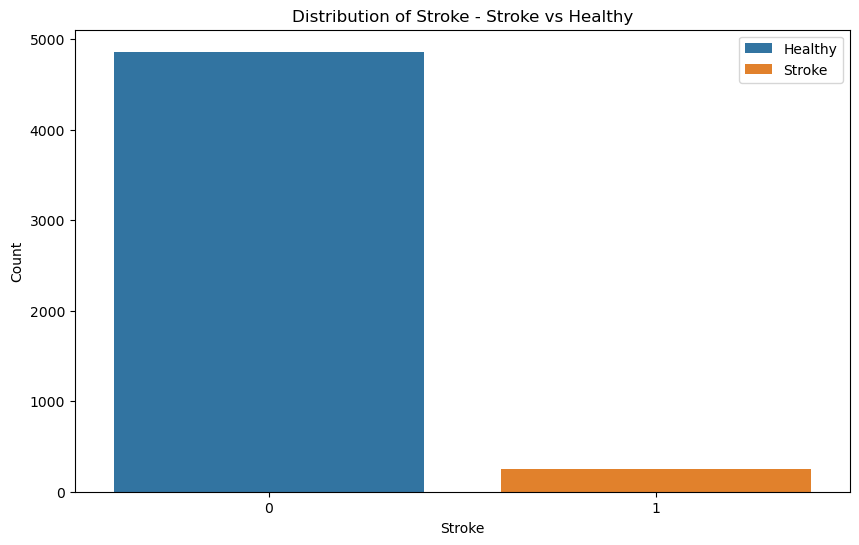

In [103]:
# Step 3: Univariate Analysis

# Analyzing Target Feature "stroke"
univariate_analyzer = UnivariateAnalyzer(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "stroke")

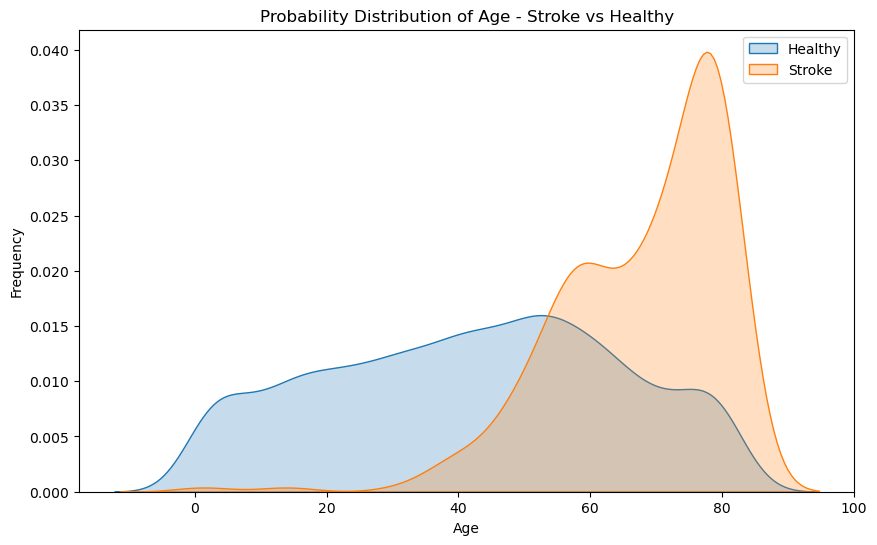

In [106]:
# Analyzing Numerical Feature "age"
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "age")

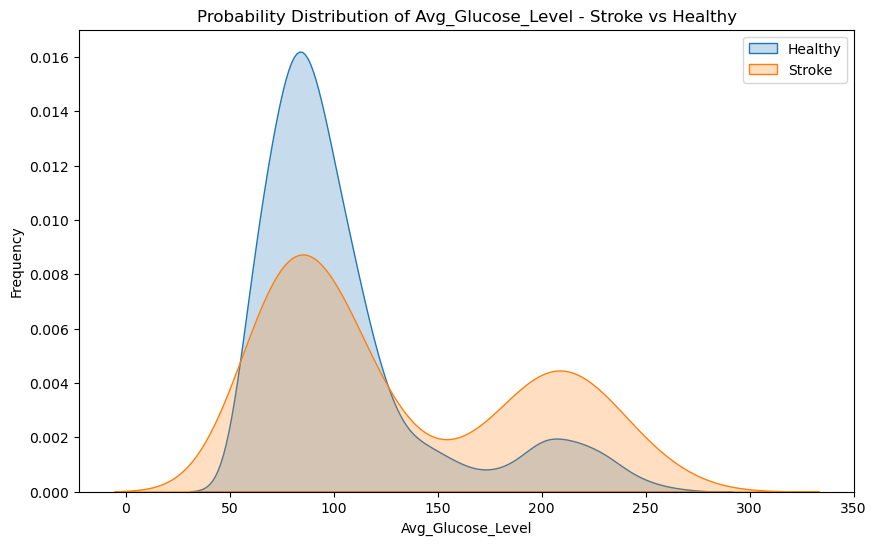

In [107]:
# Analyzing Numerical Feature "avg_glucose_level"
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "avg_glucose_level")

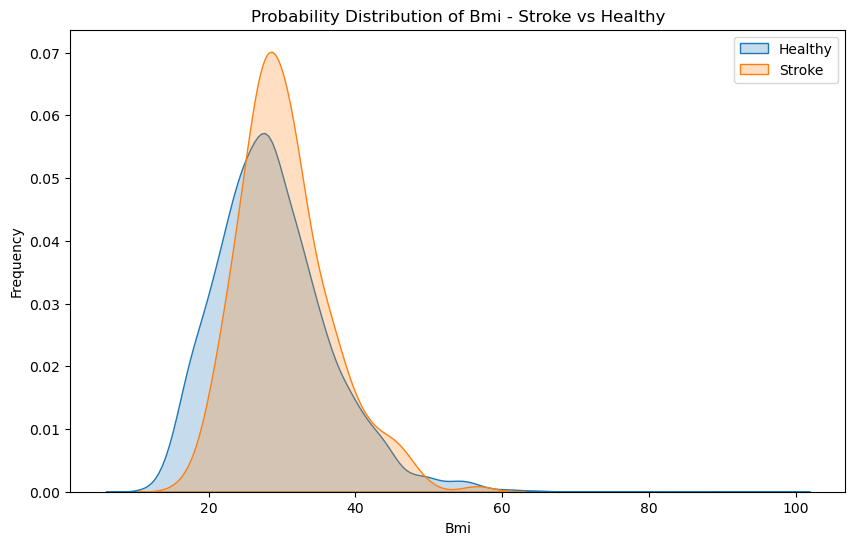

In [126]:
# Analyzing Numerical Feature "bmi"
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "bmi")

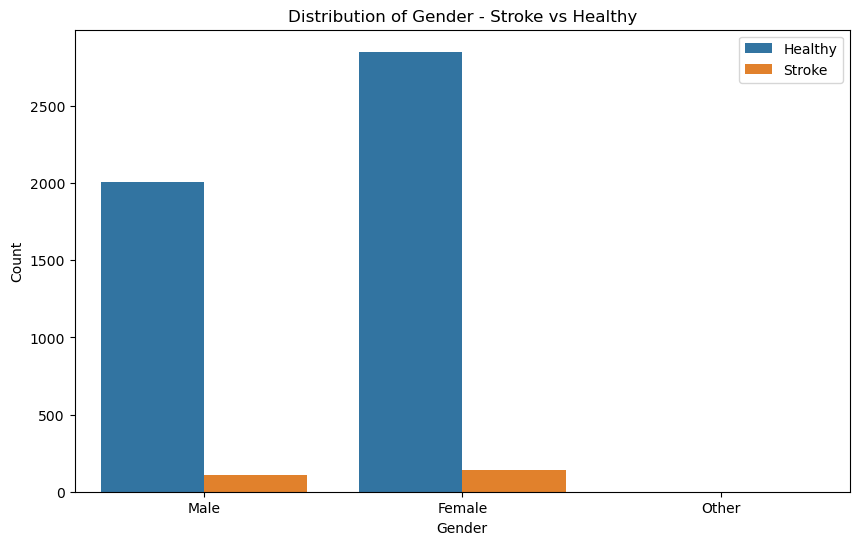

In [128]:
# Analyzing Categorical Feature "gender"
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "gender")

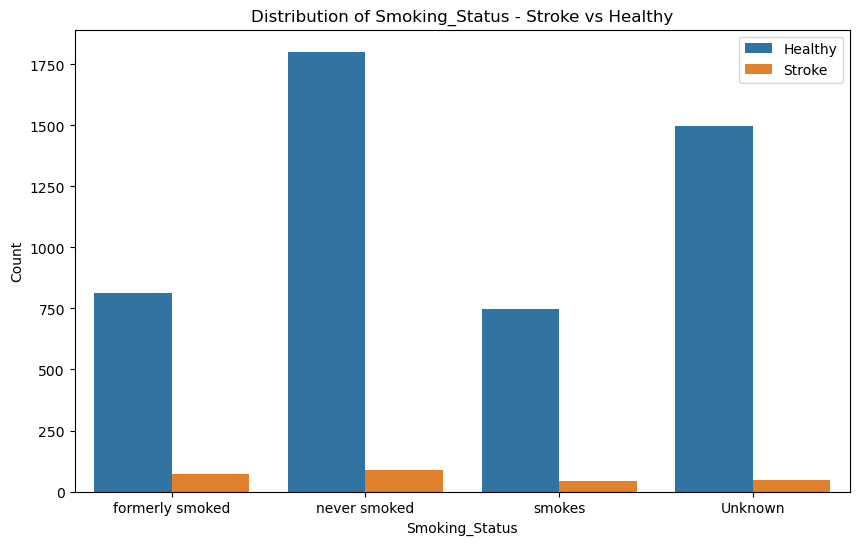

In [129]:
# Analyzing Categorical Feature "smoking_status"
univariate_analyzer.execute_analysis(df, "smoking_status")

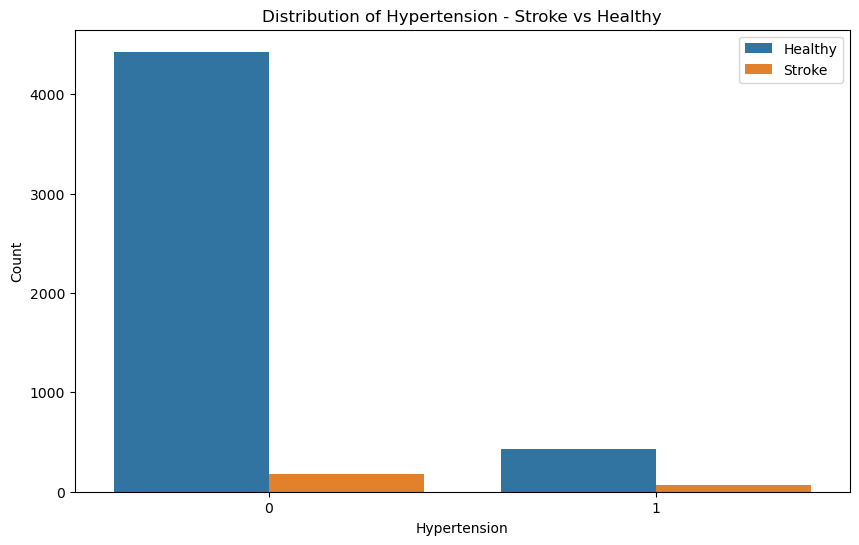

In [130]:
# Analyzing Categorical Feature "hypertension"
univariate_analyzer.execute_analysis(df, "hypertension")

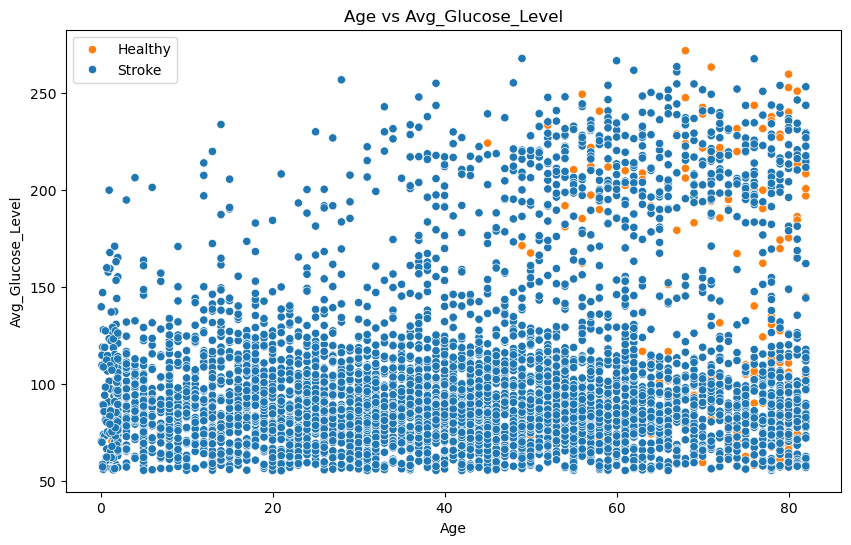

In [151]:
# Step 4: Bivariate Analysis

# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'age', 'avg_glucose_level')

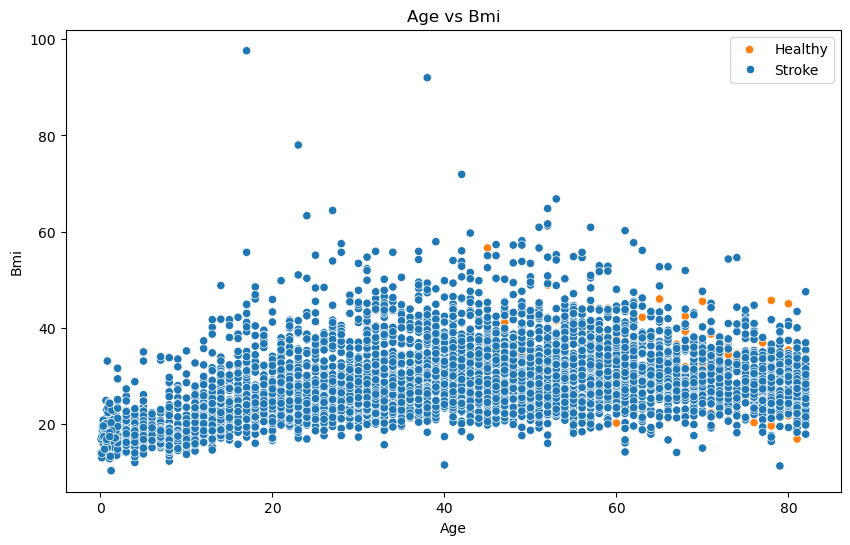

In [152]:
# Analyzing the Relationship Between Two Numerical Features

bivariate_analyzer.execute_analysis(df, 'age', 'bmi')

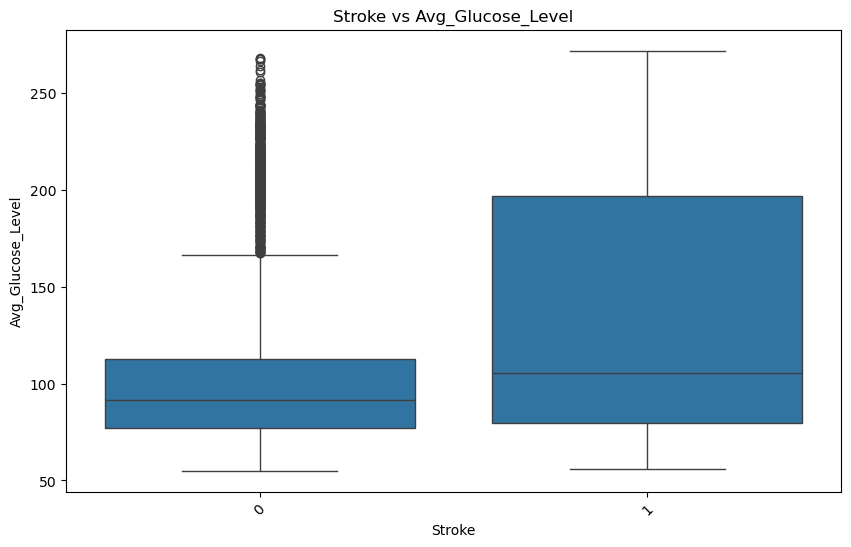

In [137]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'stroke', 'avg_glucose_level')

## Insights from Multivariate Analysis

#### **Correlation Heatmap and Pair Plot**
- Features in the dataset do not appear to be correlated.
- Highest corelation was observed between `age` and `bmi`. However, it would be considered weak.

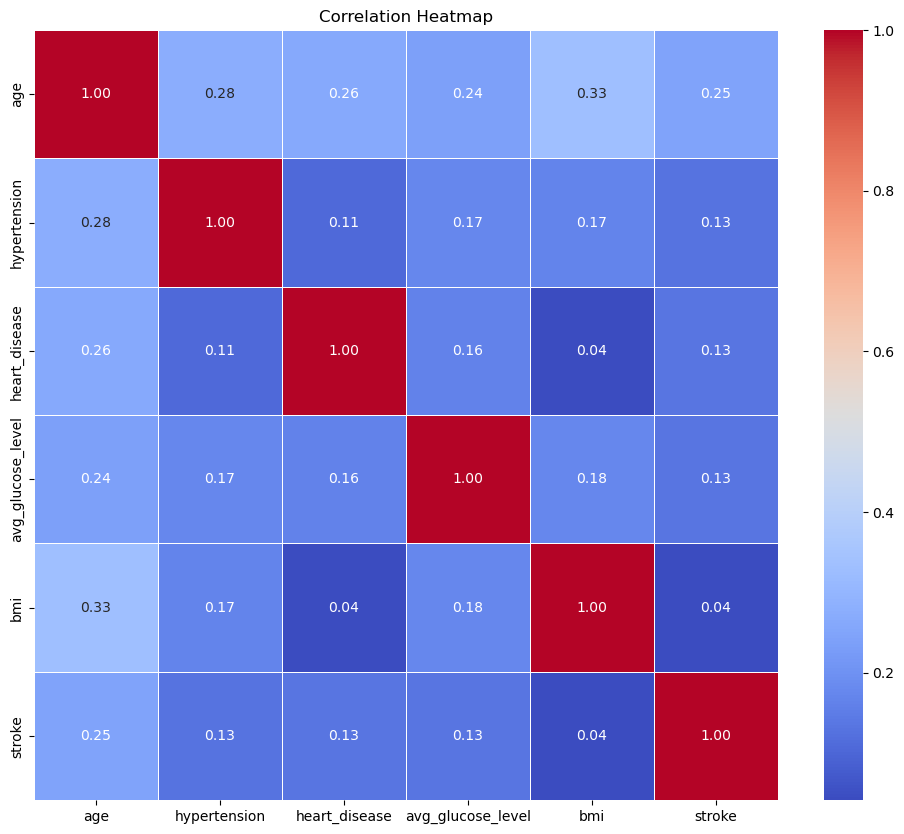

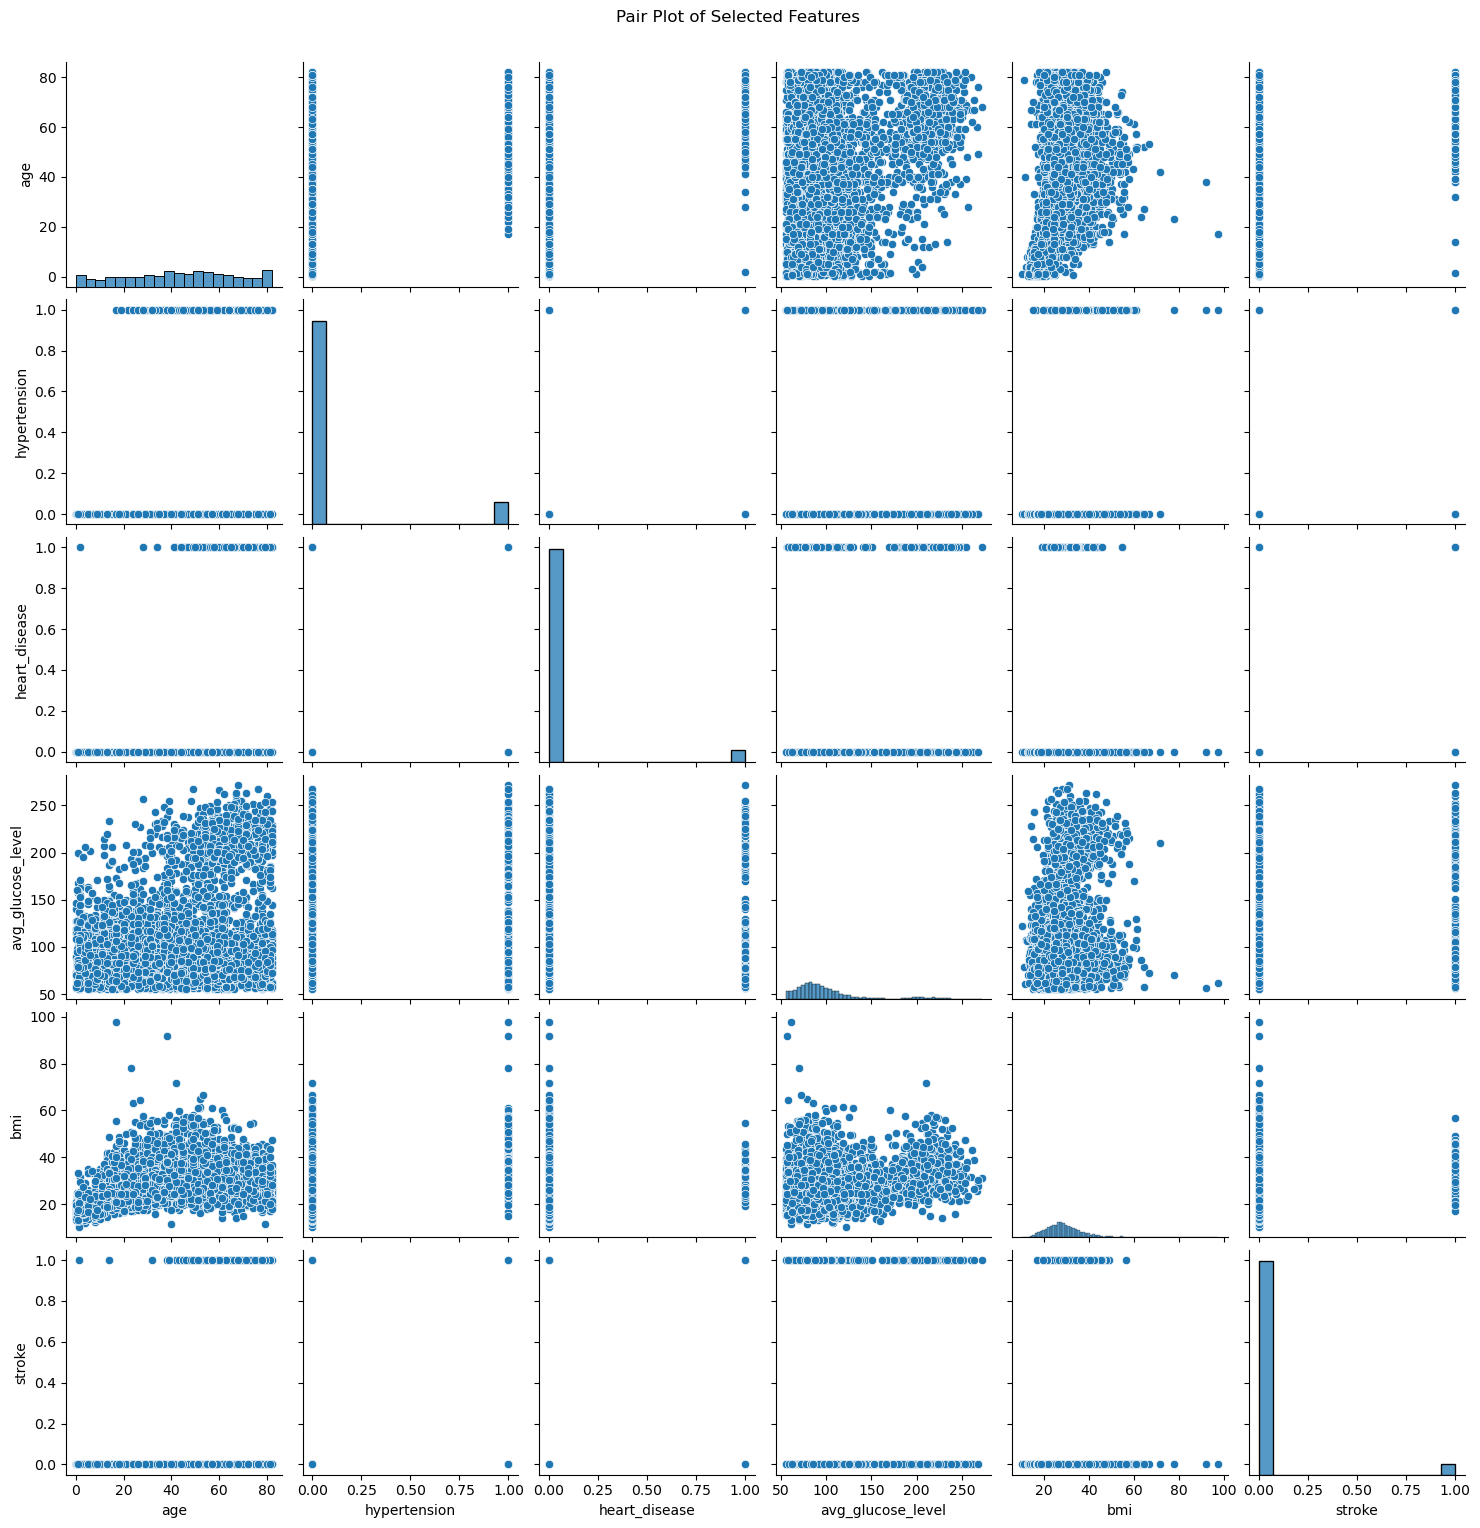

In [146]:
# Step 5: Multivariate Analysis

multivariate_analyzer = SimpleMultivariateAnalysis()

# Important features for the analysis
selected_features = df[['age', "hypertension", "heart_disease", 'avg_glucose_level', 'bmi', 'stroke']]

multivariate_analyzer.analyze(selected_features)


## **Issues to be Addressed for Creating Machine Learning Stroke Prediction Model**

1. **Handling Class Imbalance:**
   - The `stroke` column shows significant class imbalance (only ~4.87% have had a stroke). **Use techniques like oversampling (e.g., SMOTE) or undersampling** to balance the dataset. Alternatively, **employ class-weighted loss functions** to penalize misclassification of the minority class.

2. **Outlier Detection and Handling:**
   - Features like `bmi` and `avg_glucose_level` show a significant range, indicating potential outliers. These will need to be detected and handled using statistical methods (e.g., Z-scores or IQR) or domain knowledge to avoid skewing model predictions.

3. **Handling Missing Data:**
   - `BMI` has missing values (~4% of records). **Impute missing values** using mean, median, or predictive models (e.g., k-NN imputation).

4. **Feature Scaling:**
   - Numerical features like `age`, `avg_glucose_level`, and `BMI` have different ranges. These need to be normalized (e.g., MinMAxScaler) or standardized (e.g., StandardScaler) to ensure features are on comparable scales for algorithms sensitive to feature magnitudes (e.g., SVM, KNN, logistic regression)

5. **Categorical Encoding:**
   - Categorical features like `gender`, `work_type`, and `smoking_status` are not yet numeric and need to transformed using one-hot encoding.

6. **Feature Engineering:**
   - Columns like `id` have no predictive value and should be dropped.
   - Based on the insights, certain features might need to be engineered (e.g., combining related features or creating interaction terms) to better capture the relationships in the data.